# Laboratorio 3.1: Clustering

Andrés Abeliuk, Hernán Sarmiento, Cinthia Sánchez, Jorge Ortiz

Octubre 2022

## Nombres

* Benjamín Aguilar Osorio
* Felipe Keim Martínez



# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. El formato de entrega para esta actividad es un archivo **html**. Genere un archivo HTML usando jupyter (ver tutorial 2) y súbalo a U-Cursos. Basta con que **uno de los integrantes haga la entrega**. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

## Preguntas teóricas

### Pregunta 1

Verdadero o Falso (si la afirmación es falsa justifique):

1. El algoritmo DBSCAN se caracteriza por generar grupos a partir de centroides iniciales.

**Respuesta:F, es un algoritmo basado en densidades, es decir determina si un punto pertenece a cierto cluster dependiendo del número de puntos que tiene alrededor de un radio dado, si es que esta cantidad de puntos es menor a un cierto valor dado pasa a ser un outlier.**

2. El único método para validar clusters es mediante la estructura de los grupos formados, método conocido como validacion interna.

**Respuesta:F, no es el único método para validar, existen otros por ejemplo el de pureza y entropía que corresponde a un método de validación externa.**

3. Los métodos de clustering pueden servir para encontrar outliers.

**Respuesta: V.** 



## Preguntas practicas

Un amante de los pingüinos ha ido a la Antártica a recorrer las islas Biscoe, Dream y Torgersen en busca de su ave favorita. Cada vez que encontró un pingüino, anotó su sexo, su peso, la longitud de sus aletas y la longitud y profundidad de su pico. 

Luego de su travesía, esta persona nos ha encargado averiguar cuántos tipos de pingüinos encontró. El desafío de este laboratorio será descubrir mediante Clustering las especies de los pingüinos de los datos recolectados.

Ejecute el siguiente código para cargar el dataset:

In [208]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://ortizfuentes.com/datasets/penguins_dataset.csv", sep=",")

df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,male
1,Torgersen,39.5,17.4,186.0,3800.0,female
2,Torgersen,40.3,18.0,195.0,3250.0,female
3,Torgersen,36.7,19.3,193.0,3450.0,female
4,Torgersen,39.3,20.6,190.0,3650.0,male


### Pregunta 2

Convierta la información categórica en información numérica. Puede usar la técnica One Hot Encoding. Guarde un DataFrame con toda la información numérica en una variable con nombre X.

In [209]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit_transform(df[["island","sex"]])
new_array=ohe.fit_transform(df[["island","sex"]]).toarray()
ohe.categories_
new_labels=ohe.categories_
new_columns=[*new_labels[0], *new_labels[1]]
to_numeric=pd.DataFrame(new_array, columns = new_columns)
del df["sex"]
del df["island"]
X=pd.concat([df,to_numeric],axis=1)


    

### Pregunta 3

Primero intentaremos encontrar la cantidad de especies de pingüinos en los datos usando K-Means. Ejecute el siguiente código:

C:\Users\benja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


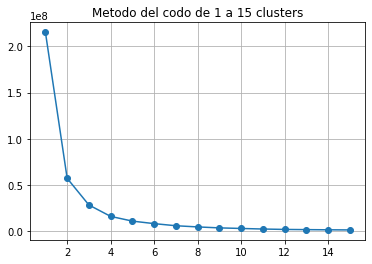

In [210]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

**1.** ¿Cuántos clusters propone usar para este dataset? Justifique su elección y recuerde que hay varias respuestas posibles.

> Respuesta: Proponemos el uso de 2 clusters, consideramos que en aplicación del método del codo el punto de diminishing returns es este, puesto que al aumentar el número de clusters la mejora es mucho menor en comparación a la anterior.

**2.** Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato.

In [211]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=20, max_iter=50, random_state=1)
kmeans.fit(X)
print(kmeans.labels_)

[0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Pregunta 4

Reduzca la dimensionalidad de los datos a 2 y grafique los datos transformados pintando los datos para tener una representación visual de los clusters. Guarden los datos en una variable llamada new_X.

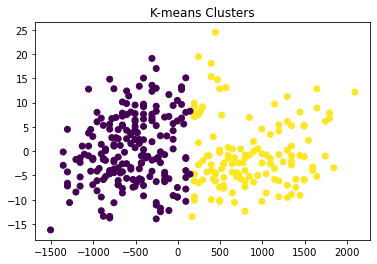

In [212]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(X)
new_X = pca.transform(X) 

plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("K-means Clusters")
plt.show()

### Pregunta 5

**1.** Usando los datos obtenidos en la pregunta 2 ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser distintos.

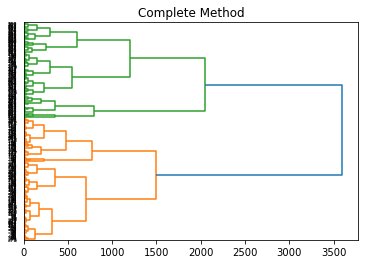

In [213]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'complete', metric='euclidean')
plt.title("Complete Method")
dn = dendrogram(Z,orientation='right')

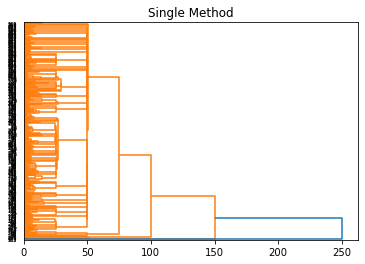

In [214]:
Z = linkage(X, 'single', metric='euclidean')
plt.title("Single Method")
dn = dendrogram(Z, orientation='right')

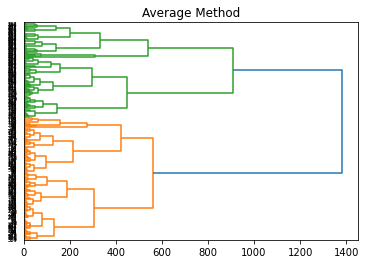

In [215]:
Z = linkage(X, 'average', metric='euclidean')
plt.title("Average Method")
dn = dendrogram(Z, orientation='right')

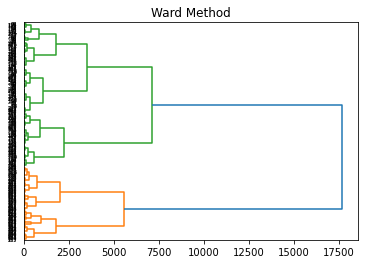

In [216]:
Z = linkage(X, 'ward', metric='euclidean')
plt.title("Ward Method")
dn = dendrogram(Z, orientation='right')

**2.** Fijándose en el método `complete`, ¿"visualmente" cuántos clusters propone usar? ¿A qué altura recomendaría cortar el árbol?

> Respuesta: 2, y propondríamos cortar el arbol alrededor del valor 2200

**3.** Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta anterior y liste la asignación de clusters para cada registro del dataset usando el método `complete`. Señale cuántos clusters se generan cortando la altura que propuso en la pregunta anterior.

In [217]:
from sklearn.cluster import AgglomerativeClustering

complete = AgglomerativeClustering(linkage="complete", 
                                       affinity='euclidean', 
                                       n_clusters=None,
                                        distance_threshold=2200).fit(X)
print(complete.n_clusters_)
print(complete.labels_)

2
[1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**4.** ¿Cuántos datos quedan asignados a cada cluster? Agregue el código necesario para obtener esta información con el método `complete`.

In [218]:
unos=sum(complete.labels_)
ceros=len(complete.labels_)-unos
print("cluster 1´s: "+str(unos)+", clusters 0´s: "+str(ceros))

cluster 1´s: 188, clusters 0´s: 145


**5.** Usando el dataset con dimensiones reducidas generado en la parte K-means (`new_X`), grafique los datos y píntelos con su asignacion de clusters según el métodos `complete` para tener una representación visual de los clusters.

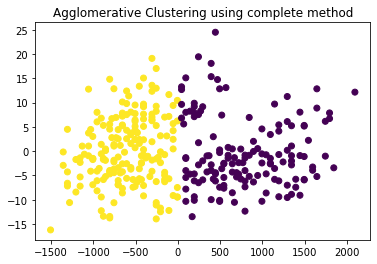

In [219]:
plt.scatter(new_X[:, 0], new_X[:, 1], c=complete.labels_)
plt.title("Agglomerative Clustering using complete method")
plt.show()

### Pregunta 6

Un experto en pingüinos ha analizado los datos y ha determinado que los pingüinos encontrados corresponden a 3 tipos de especies: Adelie, Gentoo y Chinstrap. 

<img src="https://oliviergimenez.github.io/reproducible-science-workshop/practicals/lter_penguins.png" alt="Penguins" width="500"/>



In [220]:
df_s = pd.read_csv("https://ortizfuentes.com/datasets/penguins_species.csv", sep=",")
df_s.value_counts()

species  
Adelie       146
Gentoo       119
Chinstrap     68
dtype: int64


Compare la clasificación del experto con los resultados con alguno de sus modelos de clustering. ¿Qué puede decir de los clusters generados? ¿Cómo se comportan en comparación al anotado del experto?

Hint: puede ocupar métricas de comparación, visualizaciones o bien usar los métodos [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) y [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) de pandas para comparar los datos de las tablas.

**Respuesta: Es fácil notar que la cantidad de clusters generados no es la misma que la cantidad de pingüinos visualizados por el experto, para poder entender el porqué de esto a continuación compararemos los clusters generados con las clases reales.**

In [221]:
#Con la idea de plotear, pasaremos estos datos a enteros
mapping = {'Chinstrap' : 0, 'Adelie': 1, 'Gentoo': 2}
df_s=df_s.replace({"species" : mapping})

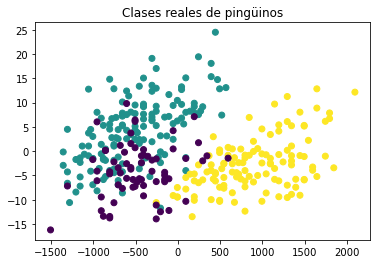

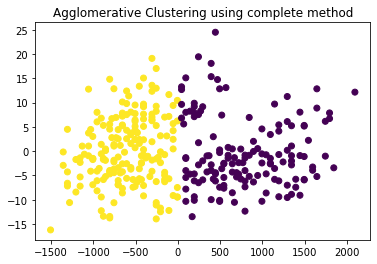

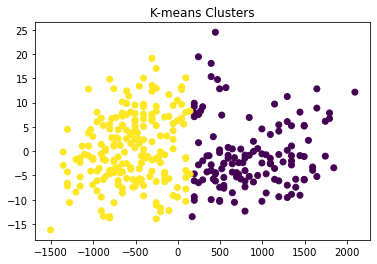

In [223]:
#Scatter de las clases de pingüinos utilizando el dataset de 2 dimensiones new_X
plt.scatter(new_X[:, 0], new_X[:, 1], c=df_s.species)
plt.title("Clases reales de pingüinos")
plt.show()
#Scatter del clustering generados con Agglomerative clustering
plt.scatter(new_X[:, 0], new_X[:, 1], c=complete.labels_)
plt.title("Agglomerative Clustering using complete method")
plt.show()
#Scatter del clustering generado con el método de K-means
plt.scatter(new_X[:, 0], new_X[:, 1], c=-kmeans.labels_)
plt.title("K-means Clusters")
plt.show()

**Respuesta: Como se puede observar, los datos obtenidos en clusters obtenidos en ambos métodos son similares, pero ambos difieren de las clases reales, esto se puede deber a que en la realidad al hacer las clasificaciones los expertos pueden considerar algunas variables que no aparecen en el dataset o en otro caso considerar que alguna de las variables tiene mayor importancia en comparación al resto de estas. Por último, podemos notar que la clasificación de los expertos mostrada en el primer gráfico nos da una idea de la dificultad de que un clustering realice una clasificación de ese tipo, donde los datos de una de las clases no se diferencian en nada a los de otra.**